# Simple moving average crossover

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
df = yf.download('EURUSD=X', start ='2008-10-9', end='2021-10-01')['Adj Close'].to_frame()

[*********************100%%**********************]  1 of 1 completed


With this strategy we will do something similar to the [previous notebook](https://github.com/alecontuIT/algo_trading_coletti/blob/main/2_Moving_average.ipynb) but taking in consideration only the moving average: we want to create a trading strategy where we take a [long position](https://www.investopedia.com/terms/l/long.asp) when the short moving average is above the long one, and similarly a [short position](https://www.investopedia.com/terms/s/short.asp) when the short moving average is under the long one.

In [6]:
# Short moving average
df['MA_s'] = df['Adj Close'].rolling(50).mean()
# Long moving average
df['MA_l'] = df['Adj Close'].rolling(200).mean()

In [7]:
df.dropna(inplace=True)

<Axes: xlabel='Date'>

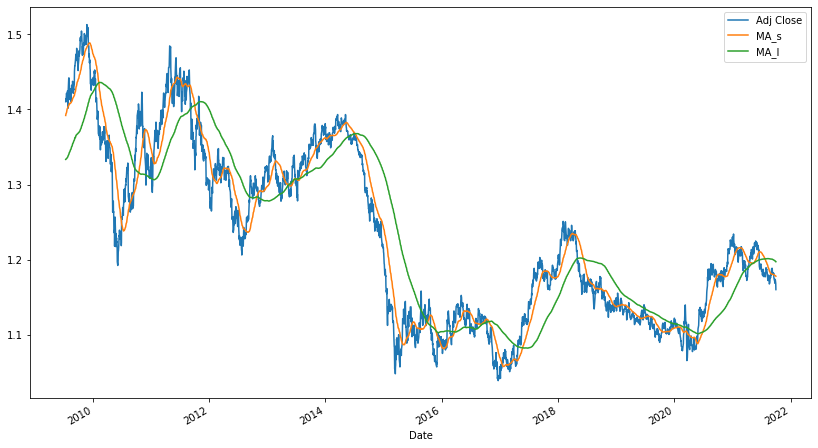

In [8]:
df.plot(figsize=(14,8))

In [14]:
# We define our trading position, that can be long or short
# +1 if we go long, -1 if we go short (do not mistake with short and long of moving average)
df['position'] = np.where(df.MA_s > df.MA_l, +1, -1)

<Axes: xlabel='Date'>

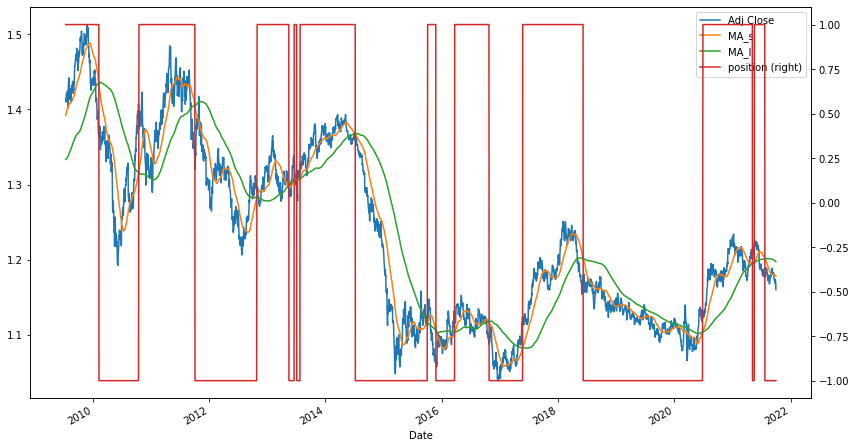

In [10]:
df.plot(secondary_y='position', figsize=(14,8))

# Backtesting

In [11]:
df['logRet'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))